# BANKING CHURN ANALYSIS & MODELING

### Problem Statement:

1. Despite the continuous efforts of banks to attract and retain customers, the banking industry faces a persistent challenge in the form of customer churn, leading to financial losses and reduced customer satisfaction.

2. It is advantageous for banks to know what leads a client towards the decision to leave the company.

### Project Objective:-

1. The aim of this project is to analyze the customer churn rate for bank because it is useful to understand why the customers leave.
2. After Analyzing we need to train a Machine Learning Model which can find the key factors that significantly influence the customer churn or attrition.
3.In the end will choose the most reliable model that will attach a probability to the churn to make it easier for customer service to target right customer in order to minimize their efforts to prevent customers churn.

### Project Overview:

Churn refers to customers leaving a bank or discontinuing their banking services.
Banking Churn Analysis is a process of studying customer behavior in the banking industry to predict and understand customer attrition or churn.
Banking Churn Modeling aims to identify patterns and factors that contribute to customer churn, enabling banks to take proactive measures to retain customers and improve customer satisfaction.

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle
import sklearn

from sklearn.preprocessing import LabelEncoder , StandardScaler,OrdinalEncoder  # Encoding
from sklearn.model_selection import train_test_split , GridSearchCV, RandomizedSearchCV # traing and tessting 
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import  XGBClassifier

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, log_loss


## LOADING DATASET

In [2]:
print(sklearn.__version__)


1.0.2


In [3]:
import xgboost as xgb
print(xgb.__version__)

1.7.5


In [4]:
df= pd.read_csv("Bank_Churn.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## BASIC UNDERSTANDING OF DATASET

### 1. Checking the Dimensions of Dataset.

In [6]:
print("Total Number of records/ rows present in the dataset is: ", df.shape[0])
print("Total Number of columns present in the dataset is: ", df.shape[1])

Total Number of records/ rows present in the dataset is:  10000
Total Number of columns present in the dataset is:  14



### 2. Fetching the attributes Name

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

1. **RowNumber**—corresponds to the record (row) number and has no effect on the output.
2.**CustomerId**— used to track and differentiate individual customers within the dataset.
3.**Surname**—the surname of a customer has no impact on their decision to leave the bank.
4.**CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5.**Geography**—a customer’s location can affect their decision to leave the bank.
6.**Gender**—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
7.**Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8.**Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more
loyal and less likely to leave a bank.
9. **Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10. **NumOfProducts**—refers to the number of products that a customer has purchased through the bank.
11. **HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12. **IsActiveMember**—active customers are less likely to leave the bank.
13. **EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14. **Exited**—whether or not the customer left the bank.

### 3. Generating Basic Information of the data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


 **Observation:**
 
    1. Dataset contains 10000 rows and 14 columns.
    2. There are 2 columns are float, 9 columns are of int and 3 columns are of object datatype.


### 4. Checking for null values

In [9]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


 **Observation:**
 
    There are no null value present in our dataset

### 5. Checking for Duplicates

In [10]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


 **Observation:**
 
    There is no duplicate records present in our dataset

### 6. Basic stistical  information about Numerical columns

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48



### 7. Basic stistical information about categorical Columns

In [12]:
df.describe(include="object")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### 8. Printing Unique values:

In [13]:
for i in df.columns:
    print("*"*20 , i, "*"*20)
    print(df[i].unique())

******************** RowNumber ********************
[    1     2     3 ...  9998  9999 10000]
******************** CustomerId ********************
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
******************** Surname ********************
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
******************** CreditScore ********************
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618

# DATA CLEANING

### 1. Dropping Insignificant Columns

In [14]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis= 1, inplace = True)

**RowNumber and CustomerID** contains unique value for each customer and doesn't seems relevent for predicting outcome.

And also **Surname** column doesnot contribute anything for predicting outcome.

### 2. Renaming Target column

In [15]:
df.rename(columns= {"Exited": "Churned"}, inplace = True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3. Creating new Creditscore range column , Age range  and income level column

In [17]:
def cs_range(x):
    if x <300:
         return "No Score"
    elif x >= 300 and x < 551:
        return "Very Low"
    elif x >= 551 and x <621:
        return "Low"
    elif  x >= 621 and x <701:
        return "Fair"
    elif  x >= 701 and x <750:
        return "Good"
    else:
        return "Excellent"

In [18]:
df["Creditscore_range"]= df["CreditScore"].apply(cs_range)

In [19]:
Age_ranges = [0, 20, 40, 60, 80, 100]
Age_labels = ["<20", '20-39', '40-59', '60-79', "80+"]
df['Age_Range'] = pd.cut(df['Age'], bins=Age_ranges, labels=Age_labels)

In [20]:
salary_ranges = [0, 50000, 100000, 150000, 200000]
salary_labels = ["Low", 'Medium', 'High', 'Very High']
df['salary_Range'] = pd.cut(df['EstimatedSalary'], bins=salary_ranges, labels=salary_labels)

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Creditscore_range,Age_Range,salary_Range
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Low,40-59,High
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Low,40-59,High
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Very Low,40-59,High
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Fair,20-39,Medium
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent,40-59,Medium


# EXPLORATORY DATA ANALYSIS

### 1. What is the distribution of customers who have exited versus those who haven't?

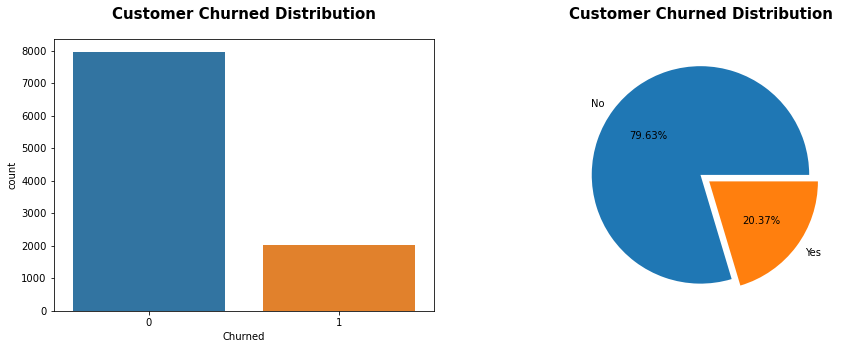

In [22]:

plt.figure(figsize= (15,5))

plt.subplot(1,2, 1)
sns.countplot(df["Churned"])

plt.title("Customer Churned Distribution",
          fontsize=15,
          color="Black", fontweight="bold", loc= "center",
     pad="20")

plt.subplot(1,2, 2)

plt.pie(df['Churned'].value_counts().values,labels=["No", "Yes"], autopct= "%.2f%%", explode=[0,0.1])

plt.title("Customer Churned Distribution",
          fontsize=15,
          color="Black", fontweight="bold", loc= "center",
          pad="20")
plt.show()

### **Observation:**

        1.There are very few number of customer how had discountinued the bank as compared to how stayed.
        2. By analyzing above chart, we can say that there is huge imbalance in Target column. so we need to balance them 
        otherwise it can affect our model performance.

### 2. What is the distribution of customers across different geographies?

In [23]:
def countplot(column):
    plt.figure(figsize= (15,5))

    sns.countplot(df[column], hue= df["Churned"], palette="Set2")

    plt.title(f"Customer Churned by {column}",
              fontsize=15,
              color="Black", fontweight="bold", loc= "center",
         pad="20")


    plt.show()

In [24]:
churned= df.groupby("Geography")["Churned"].count().to_frame().rename(columns= {"Churned": "Total Customers"})

In [25]:
churned["Stay"]= df[df["Churned"]==0].groupby("Geography")["Churned"].count()
churned["Churned"]= df[df["Churned"]==1].groupby("Geography")["Churned"].count()
churned["Churned rate"]= churned["Churned"]/10000* 100


In [26]:
churned

,Total Customers,Stay,Churned,Churned rate
Geography,,,,
France,5014,4204,810,8.10
Germany,2509,1695,814,8.14
Spain,2477,2064,413,4.13


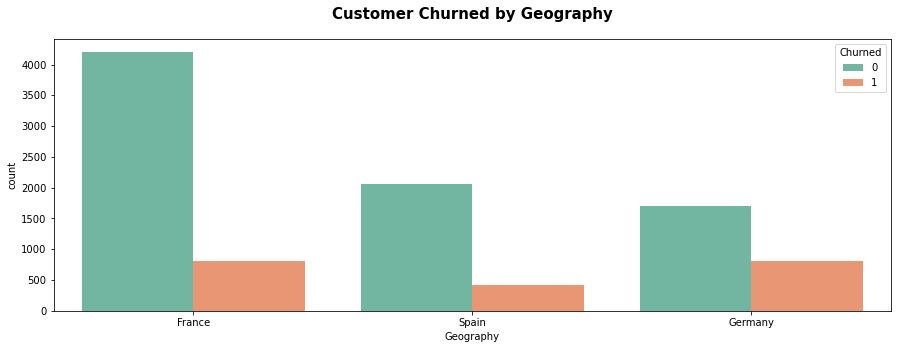

In [27]:
countplot("Geography")

**Observation:**

        1.By Analyzing chart, we can say that out of total number of customers(10,000) half of the customers are from 
        France (5014) and followed by Spain(2509) and Germany(2477).
       
        
        2. Spain(2509) and Germany(2477) has almost equal number of customer but churned rate of Germany(8.14) is double as compared to spain(4.13)
        
        3. Churn rate is same in case of France(8.10) and Germany(8.14). But there is huge difference between total customers of france and germany. So we can say that germany has high churned rate.
        
       
        

### 3. Is there a significant difference in churn rates between male and female customers?

In [28]:
churned= df.groupby("Gender")["Churned"].count().to_frame().rename(columns= {"Churned": "Total Customers"})
churned["Stay"]= df[df["Churned"]==0].groupby("Gender")["Churned"].count()
churned["Churned"]= df[df["Churned"]==1].groupby("Gender")["Churned"].count()
churned["Churned rate"]= churned["Churned"]/10000* 100
churned

,Total Customers,Stay,Churned,Churned rate
Gender,,,,
Female,4543,3404,1139,11.39
Male,5457,4559,898,8.98


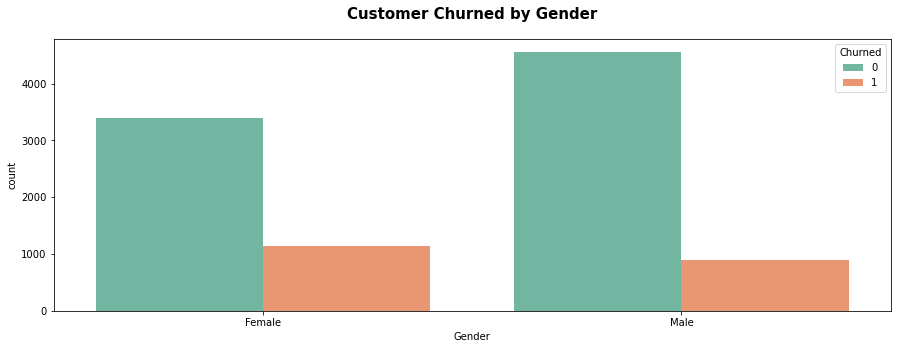

In [29]:
countplot("Gender")

### Observation:
    1. There are almost equal number of male and female customers which is 5457 and 4543 respectively.
    2. Churned rate is high among the female customers as campared to male.Which means female customers
    are more deactivating their banking facilities compared to male customers.

## 4. Is there a relationship between churn and having a credit card (HasCrCard)?

In [30]:
churned= df.groupby("HasCrCard")["Churned"].count().to_frame().rename(columns= {"Churned": "Total Customers"})
churned["Stay"]= df[df["Churned"]==0].groupby("HasCrCard")["Churned"].count()
churned["Churned"]= df[df["Churned"]==1].groupby("HasCrCard")["Churned"].count()
churned["Churned rate"]= churned["Churned"]/churned["Total Customers"]* 100
churned

,Total Customers,Stay,Churned,Churned rate
HasCrCard,,,,
0,2945,2332,613,20.814941
1,7055,5631,1424,20.184266


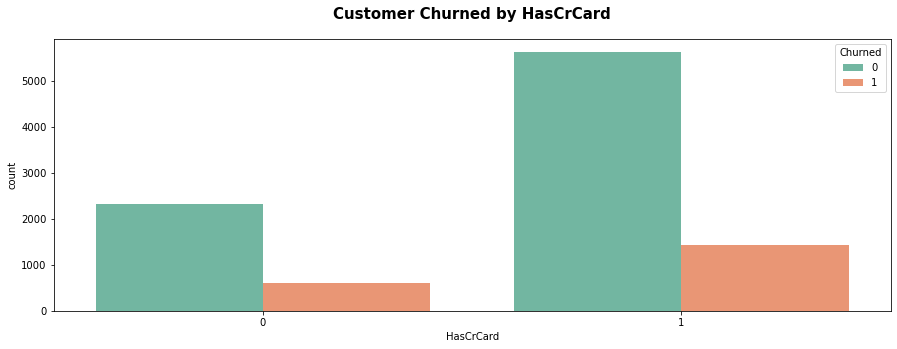

In [31]:
countplot("HasCrCard")

### Observation:
    1. More than 70% of customers having credit cards.
    2. Churned rate among customer who havng credict card and not are same.

## 5. How does the activity level (IsActiveMember) affect the likelihood of churn?

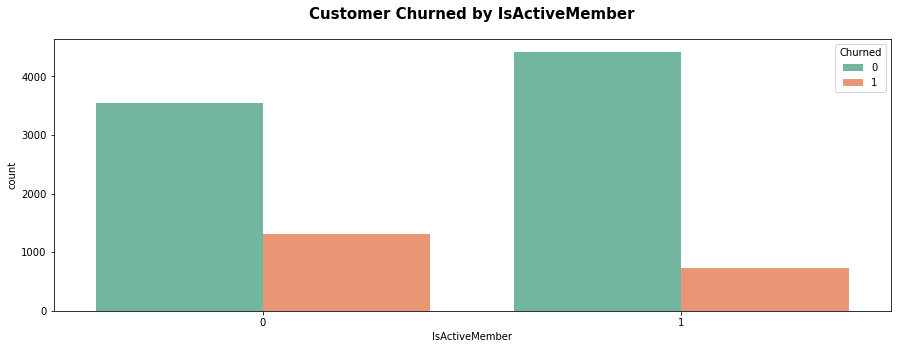

In [32]:
countplot("IsActiveMember")

## 6.  Is there a correlation between the number of products a customer has and their likelihood of churn?

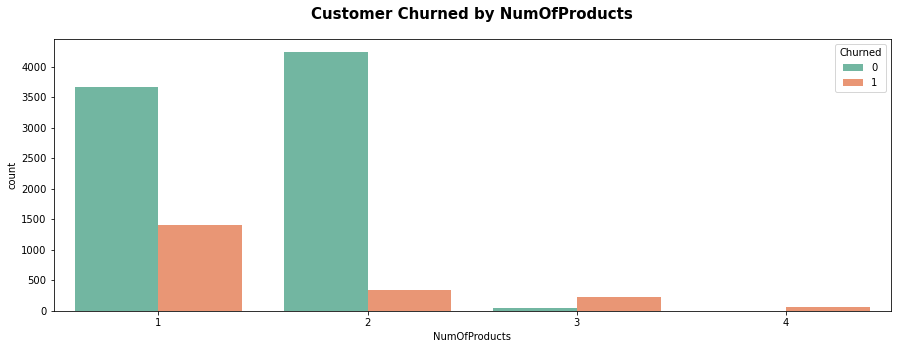

In [33]:
countplot("NumOfProducts")

## 7. Does the tenure (length of customer relationship) have an impact on customer churn?

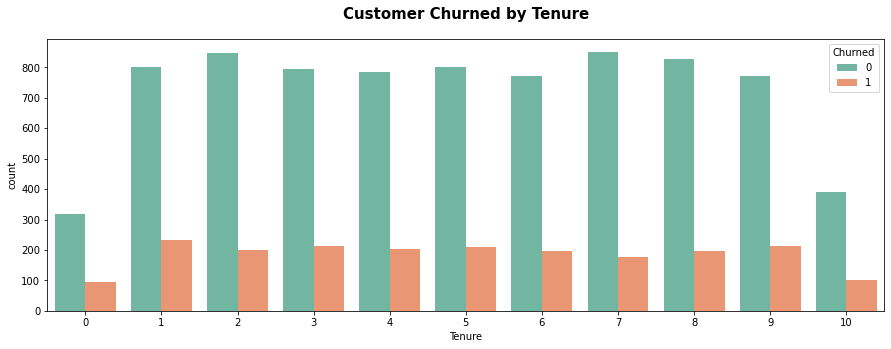

In [34]:
countplot("Tenure")

## 8. What is the distribution of credit scores among churned and non-churned customers?

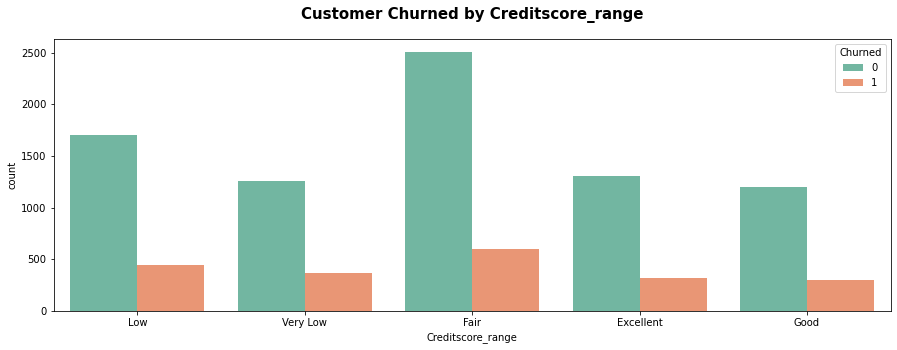

In [35]:
countplot("Creditscore_range")

In [36]:
def box_dist(column):
    plt.figure(figsize= (15,5))

    plt.subplot(1,2, 1)
    sns.histplot(x=column,hue="Churned",data=df,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    

    plt.subplot(1,2, 2)
    sns.boxplot(df["Churned"],df[column],palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

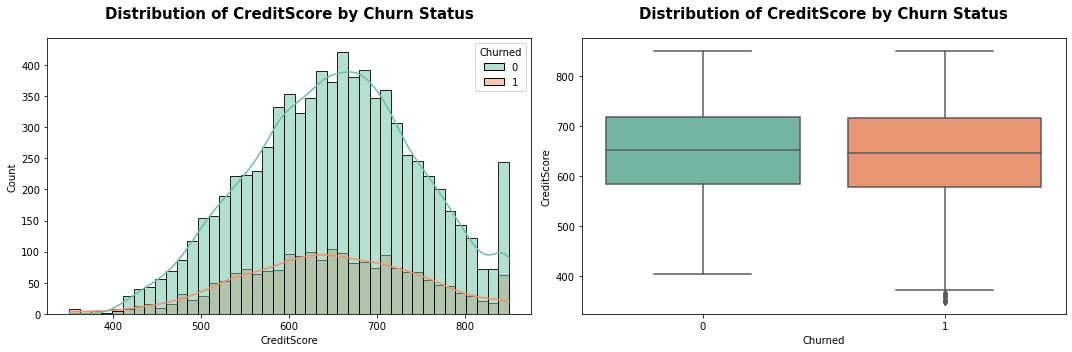

In [37]:
box_dist("CreditScore")

## 9. How does the age distribution vary between churned and non-churned customers?

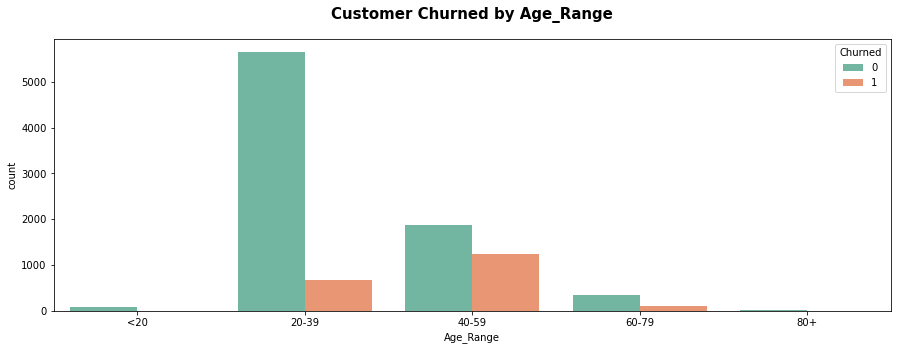

In [38]:
countplot("Age_Range")

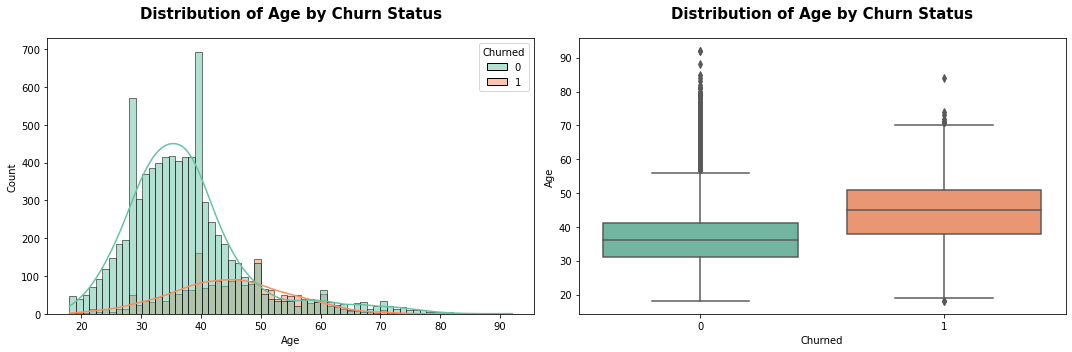

In [39]:
box_dist("Age")

## 10.  What is the distribution of account balances for churned and non-churned customers?

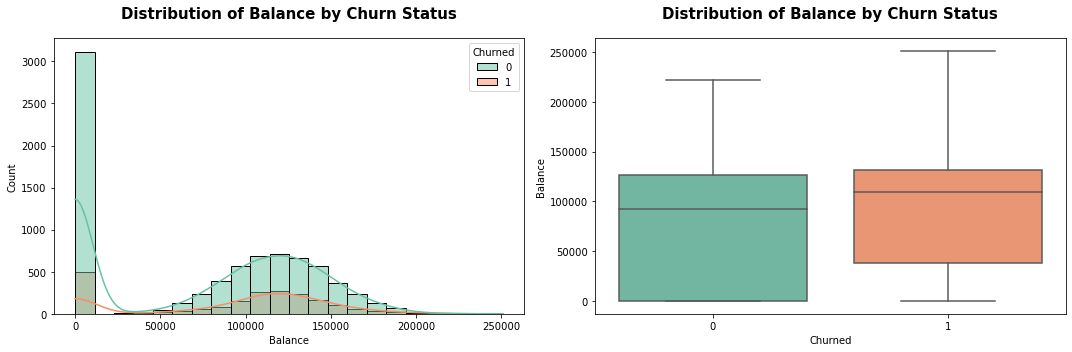

In [40]:
box_dist("Balance")

## 11. Visualizing Customer Churned by "Estimated Salary".

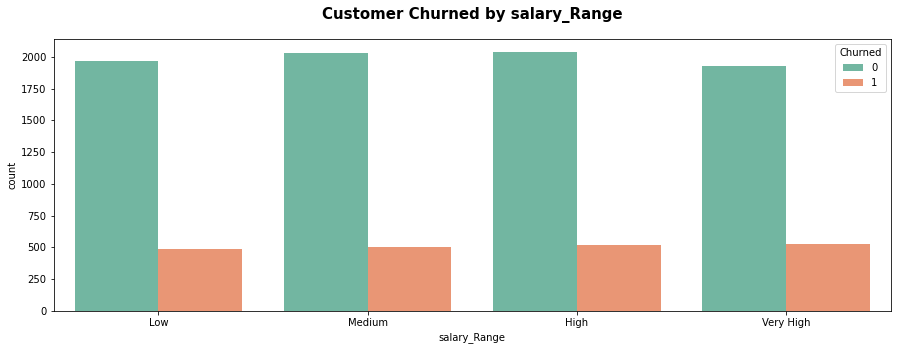

In [41]:
countplot("salary_Range")

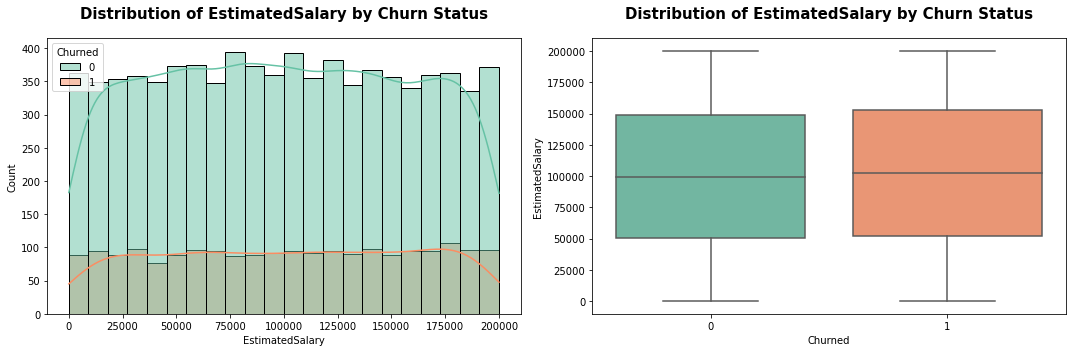

In [42]:
box_dist("EstimatedSalary")

# DATA PREPROCESSNG

## 1. Checking Skewness of Continous Features.

In [43]:
num_col=  ["CreditScore","Age","EstimatedSalary"]

In [44]:
df[num_col].skew().to_frame().rename(columns= {0: "skewness"})

,skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


In [45]:
# age column is highly right skewed. skeweness can impact the performance of model.
# to overcome the righ skewed distribution we can perform log transformation on age column to get normal distribution

In [46]:
old_age= df["Age"]
df["Age"]= np.log(df["Age"])

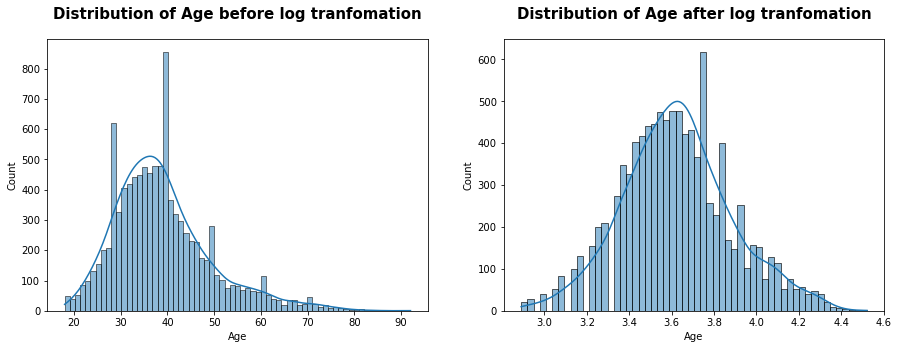

In [47]:
plt.figure(figsize= (15,5))

plt.subplot(1,2, 1)
sns.histplot(x= old_age,kde=True,palette="Set2")
plt.title(f"Distribution of Age before log tranfomation",fontweight="black",pad=20,size=15)
    
plt.subplot(1,2, 2)
sns.histplot(x= df["Age"],kde=True,palette="Set2")
plt.title(f"Distribution of Age after log tranfomation",fontweight="black",pad=20,size=15)
plt.show()

## 2. Feature selection:

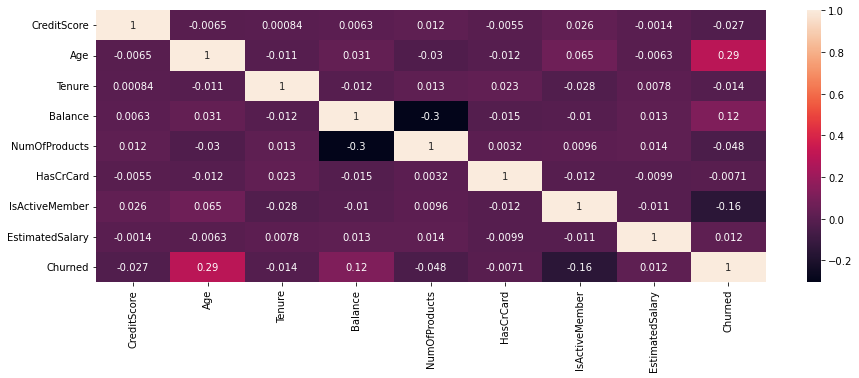

In [48]:
plt.figure(figsize= (15,5))
sns.heatmap(df.corr(), annot= True)
plt.show()

In [49]:
## 3. Separating Indepenent (x) and Dependent Variable (y):

In [50]:
x= df.iloc[:, :-4]

In [51]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,3.737670,2,0.00,1,1,1,101348.88
1,608,Spain,Female,3.713572,1,83807.86,1,0,1,112542.58
2,502,France,Female,3.737670,8,159660.80,3,1,0,113931.57
3,699,France,Female,3.663562,1,0.00,2,0,0,93826.63
4,850,Spain,Female,3.761200,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,3.663562,5,0.00,2,1,0,96270.64
9996,516,France,Male,3.555348,10,57369.61,1,1,1,101699.77
9997,709,France,Female,3.583519,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,3.737670,3,75075.31,2,1,0,92888.52


In [52]:
y = df["Churned"]

In [53]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Churned, Length: 10000, dtype: int64

## 4. Encoding

In [54]:
cat_col= df.select_dtypes(include= "object").columns
cat_col

Index(['Geography', 'Gender', 'Creditscore_range'], dtype='object')

In [55]:
from sklearn.compose import ColumnTransformer


In [56]:
ct=ColumnTransformer([("oencoder", OrdinalEncoder(),['Geography', 'Gender'])], remainder= "passthrough")

In [57]:
x=ct.fit_transform(x)

In [58]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Creditscore_range,Age_Range,salary_Range
0,619,France,Female,3.737670,2,0.00,1,1,1,101348.88,1,Low,40-59,High
1,608,Spain,Female,3.713572,1,83807.86,1,0,1,112542.58,0,Low,40-59,High
2,502,France,Female,3.737670,8,159660.80,3,1,0,113931.57,1,Very Low,40-59,High
3,699,France,Female,3.663562,1,0.00,2,0,0,93826.63,0,Fair,20-39,Medium
4,850,Spain,Female,3.761200,2,125510.82,1,1,1,79084.10,0,Excellent,40-59,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,3.663562,5,0.00,2,1,0,96270.64,0,Excellent,20-39,Medium
9996,516,France,Male,3.555348,10,57369.61,1,1,1,101699.77,0,Very Low,20-39,High
9997,709,France,Female,3.583519,7,0.00,1,0,1,42085.58,1,Good,20-39,Low
9998,772,Germany,Male,3.737670,3,75075.31,2,1,0,92888.52,1,Excellent,40-59,Medium


## 5. Applying SMOTE to Overcome the Class-Imbalance in Target Variable

In [59]:
smt= SMOTE(random_state=123)
x_resampled, y_resampled= smt.fit_resample(x, y)

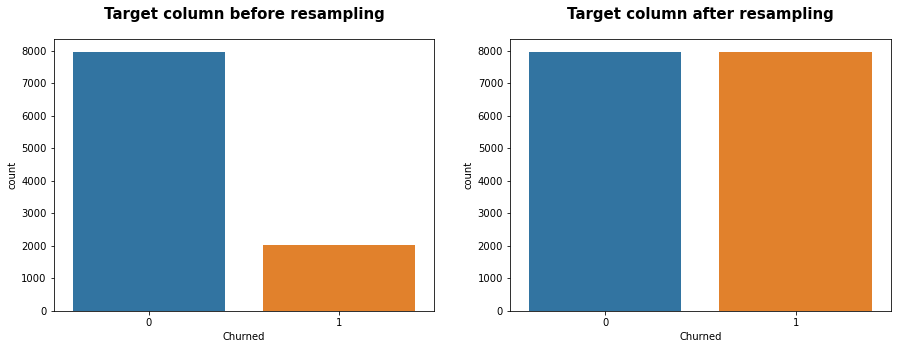

In [60]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
sns.countplot(y)
plt.title(f"Target column before resampling",fontweight="black",pad=20,size=15)
plt.subplot(1,2,2)
sns.countplot(y_resampled)
plt.title(f"Target column after resampling",fontweight="black",pad=20,size=15)
plt.show()

## 6. Splitting Data for Model Training and testing:

In [61]:
xtrain, xtest, ytrain, ytest= train_test_split(x_resampled, y_resampled, random_state= 123, test_size= 0.20)

In [62]:
xtrain.shape, ytrain.shape

((12740, 10), (12740,))

In [63]:
xtest.shape, ytest.shape

((3186, 10), (3186,))

In [64]:
#Both the categories in Target variable are now having equal number of records.

In [65]:
sc= StandardScaler()
xtrain1= sc.fit_transform(xtrain)
xtest1= sc.fit_transform(xtest)

# MODEL BUILDING:

In [66]:

knn= KNeighborsClassifier(n_neighbors=3)
lreg= LogisticRegression()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
ad= AdaBoostClassifier()
xg= XGBClassifier()
gd= GradientBoostingClassifier()


In [67]:
Training_score= []
Testing_score= []
def model_building(model):
    model.fit(xtrain, ytrain)
    ytrain_pred= model.predict(xtrain)
    ytest_pred= model.predict(xtest)
    a= accuracy_score(ytrain, ytrain_pred)
    b= accuracy_score(ytest, ytest_pred)
    Training_score.append(a)
    Testing_score.append(b)
    print(model)
    print("Train Data\n", classification_report(ytrain,ytrain_pred))
    print("Test Data\n", classification_report(ytest,ytest_pred))
    
 # function for model which require scaling    
def smodel_building(model):
    model.fit(xtrain1, ytrain)
    ytrain_pred= model.predict(xtrain1)
    ytest_pred= model.predict(xtest1)
    a= accuracy_score(ytrain, ytrain_pred)
    b= accuracy_score(ytest, ytest_pred)
    Training_score.append(a)
    Testing_score.append(b)
    print(model)
    print("Train Data\n", classification_report(ytrain,ytrain_pred))
    print("Test Data\n", classification_report(ytest,ytest_pred))  
    

In [68]:
def roc_auc_curve(model):
    ytest_proba= model.predict_proba(xtest)
    fpr, tpr, threshold= roc_curve(ytest, ytest_proba[:, 1])
    roc_score= roc_auc_score(ytest, ytest_proba[:, 1])
    sns.lineplot(x= fpr, y= tpr)
    sns.lineplot(x= [0.0, 1.0], y= [0.0, 1.0], color = "red", linestyle= "--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC-AUC CURVE",fontweight="black",pad=20,size=15)
    print(roc_score)
def sroc_auc_curve(model):
    ytest_proba= model.predict_proba(xtest1)
    fpr, tpr, threshold= roc_curve(ytest, ytest_proba[:, 1])
    roc_score= roc_auc_score(ytest, ytest_proba[:, 1])
    sns.lineplot(x= fpr, y= tpr)
    sns.lineplot(x= [0.0, 1.0], y= [0.0, 1.0], color = "red", linestyle= "--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC-AUC CURVE",fontweight="black",pad=20,size=15)
    print(roc_score)

In [69]:
log_l=[]
def calculate_logloss(model):
    print("log_loss")
    ytest_proba= model.predict_proba(xtest)
    logloss= log_loss(ytest, ytest_proba[:, -1])
    log_l.append(logloss)
    return logloss
def scalculate_logloss(model):
    print("log_loss")
    ytest_proba= model.predict_proba(xtest1)
    logloss= log_loss(ytest ,ytest_proba[:, -1])
    log_l.append(logloss)
    return logloss

# K-Nearest Neighbors model

KNeighborsClassifier(n_neighbors=3)
Train Data
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      6350
           1       0.91      0.96      0.93      6390

    accuracy                           0.93     12740
   macro avg       0.93      0.93      0.93     12740
weighted avg       0.93      0.93      0.93     12740

Test Data
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1613
           1       0.83      0.88      0.85      1573

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186

0.9165442571856369
log_loss
1.6009059672270665


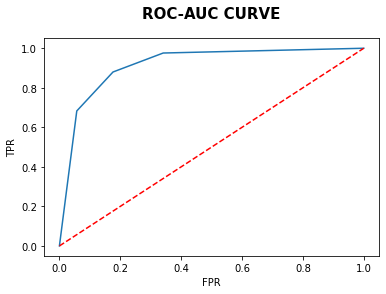

In [70]:
smodel_building(knn)
sroc_auc_curve(knn)
print(scalculate_logloss(knn))

# Logistic Regression Model

LogisticRegression()
Train Data
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      6350
           1       0.70      0.73      0.71      6390

    accuracy                           0.71     12740
   macro avg       0.71      0.71      0.71     12740
weighted avg       0.71      0.71      0.71     12740

Test Data
               precision    recall  f1-score   support

           0       0.73      0.70      0.71      1613
           1       0.70      0.73      0.72      1573

    accuracy                           0.72      3186
   macro avg       0.72      0.72      0.72      3186
weighted avg       0.72      0.72      0.72      3186

0.7851491911121061
log_loss
0.5598073328091095


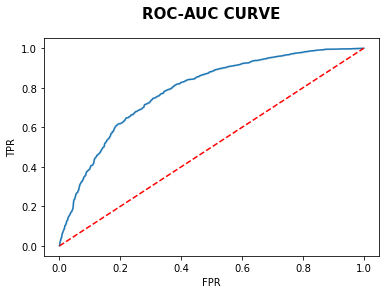

In [71]:
smodel_building(lreg)
sroc_auc_curve(lreg)
print(scalculate_logloss(lreg))

# Decision Tree Classifier Model

DecisionTreeClassifier()
Train Data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6350
           1       1.00      1.00      1.00      6390

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740

Test Data
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1613
           1       0.87      0.86      0.87      1573

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186

0.868725142861422
log_loss
4.531503468849205


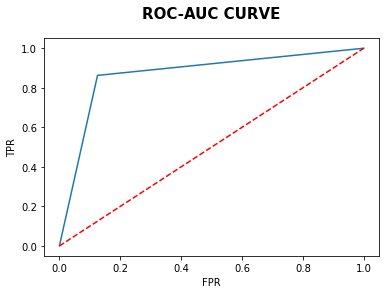

In [72]:
model_building(dt)
roc_auc_curve(dt)
print(calculate_logloss(dt))

# Random Forest Model

RandomForestClassifier()
Train Data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6350
           1       1.00      1.00      1.00      6390

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740

Test Data
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1613
           1       0.94      0.87      0.90      1573

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186

0.9654968826473082
log_loss
0.26080358190385694


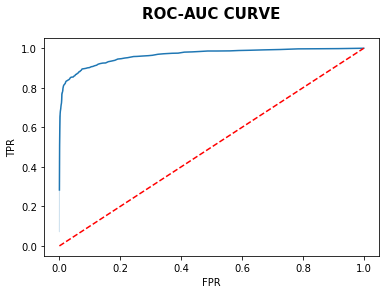

In [73]:
model_building(rf)
roc_auc_curve(rf)
print(calculate_logloss(rf))

# Ada- Boost-Classifier Model

AdaBoostClassifier()
Train Data
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      6350
           1       0.92      0.87      0.89      6390

    accuracy                           0.89     12740
   macro avg       0.89      0.89      0.89     12740
weighted avg       0.89      0.89      0.89     12740

Test Data
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1613
           1       0.92      0.86      0.89      1573

    accuracy                           0.89      3186
   macro avg       0.90      0.89      0.89      3186
weighted avg       0.90      0.89      0.89      3186

0.9584530331867309
log_loss
0.6638361761969389


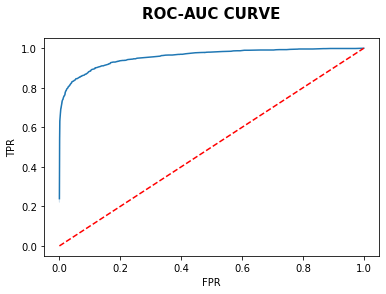

In [74]:
model_building(ad)
roc_auc_curve(ad)
print(calculate_logloss(ad))

# Gradient-Boosting-Classifier Model

GradientBoostingClassifier()
Train Data
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      6350
           1       0.94      0.87      0.90      6390

    accuracy                           0.91     12740
   macro avg       0.91      0.91      0.91     12740
weighted avg       0.91      0.91      0.91     12740

Test Data
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1613
           1       0.94      0.85      0.90      1573

    accuracy                           0.90      3186
   macro avg       0.91      0.90      0.90      3186
weighted avg       0.91      0.90      0.90      3186

0.964298931638164
log_loss
0.23656066299843032


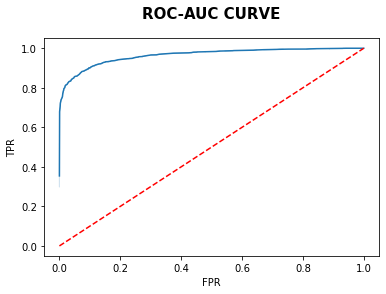

In [75]:
model_building(gd)
roc_auc_curve(gd)
print(calculate_logloss(gd))

# XGBClassifier Model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Train Data
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      6350
           1       0.99      0.94      0.96      6390

    accuracy                           0.97     12740
   macro avg      

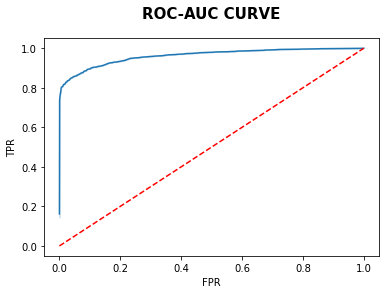

In [76]:
model_building(xg)
roc_auc_curve(xg)
print(calculate_logloss(xg))

# All MODELS PERFORMANCE COMPARISON

In [77]:
Models= ["k-Nearest Neighbors","Logistic Regression" ,"Decision Tree Classifier", "Random forest Classifier" ,
        "Ada-Boosting Classifier", "Gradiant- Bossting Classifier", "XGBclassifier"]

In [78]:
df = pd.DataFrame({"Algorithms":Models,
                   "Training Score":Training_score,
                   "Testing Score":Testing_score,
                  "log_loss": log_l})

In [79]:
df

,Algorithms,Training Score,Testing Score,log_loss
0,k-Nearest Neighbors,0.931790,0.851538,1.600906
1,Logistic Regression,0.708556,0.716573,0.559807
2,Decision Tree Classifier,1.000000,0.868801,4.531503
3,Random forest Classifier,1.000000,0.907407,0.260804
4,Ada-Boosting Classifier,0.893171,0.893597,0.663836
5,Gradiant- Bossting Classifier,0.908163,0.902072,0.236561
6,XGBclassifier,0.965463,0.902385,0.229119


On the Basis of above performance table of all the algorithms, We are going to select 2 top performing 
algorithms while testing.

Top performing algorithms are :

    1.  Random forest classifier with test accuracy - 0.87 and  logloss - 0.320721
    
    2.  XGBclassifier with test accuracy - 0.90 and log loss- 0.243680

# HyperTuning of Random Forest Classifier

In [80]:
Training_score_final= []
Testing_score_final= []
def model_building_final(model):
    model.fit(xtrain, ytrain)
    ytrain_pred= model.predict(xtrain)
    ytest_pred= model.predict(xtest)
    a= accuracy_score(ytrain, ytrain_pred)
    b= accuracy_score(ytest, ytest_pred)
    Training_score_final.append(a)
    Testing_score_final.append(b)
    print(model)
    print("Train Data\n", classification_report(ytrain,ytrain_pred))
    print("Test Data\n", classification_report(ytest,ytest_pred))
def roc_auc_curve(model):
    ytest_proba= model.predict_proba(xtest)
    fpr, tpr, threshold= roc_curve(ytest, ytest_proba[:, 1])
    roc_score= roc_auc_score(ytest, ytest_proba[:, 1])
    sns.lineplot(x= fpr, y= tpr)
    sns.lineplot(x= [0.0, 1.0], y= [0.0, 1.0], color = "red", linestyle= "--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC-AUC CURVE",fontweight="black",pad=20,size=15)
    print(roc_score)
log_l_final=[]
def calculate_logloss(model):
    print("log_loss")
    ytest_proba= model.predict_proba(xtest)
    logloss= log_loss(ytest, ytest_proba[:, -1])
    log_l_final.append(logloss)
    return logloss

In [81]:
random_forest_params = {
    'n_estimators': [25,50,75,100],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10],
    'criterion': ["gini", "entropy"],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [82]:
rf_reg = RandomizedSearchCV(rf, param_distributions= random_forest_params, cv= 5, n_jobs= -1 , scoring = "accuracy", random_state=42)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75, 100]},
                   random_state=42, scoring='accuracy')
Train Data
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6350
           1       0.96      0.89      0.92      6390

    accuracy                           0.93     12740
   macro avg       0.93      0.93      0.93     12740
weighted

0.25107598317264496

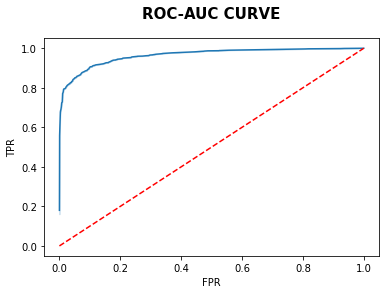

In [83]:
model_building_final(rf_reg)
roc_auc_curve(rf_reg)
calculate_logloss(rf_reg)

## Hyperparameter tuning of XGBoosting Classifier

In [84]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

In [85]:
xg_rs = RandomizedSearchCV(xg, param_distributions= param_grid, cv= 5, n_jobs= -1 , scoring = "accuracy" , random_state=42)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
               

0.215498511359796

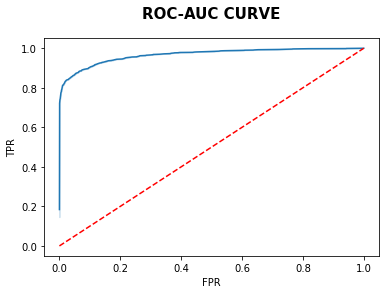

In [86]:
model_building_final(xg_rs)
roc_auc_curve(xg_rs)
calculate_logloss(xg_rs)

In [87]:
df = pd.DataFrame({"Algorithms":[ "Random forest Classifier","XGBclassifier" ],
                   "Training Score":Training_score_final,
                   "Testing Score":Testing_score_final,
                  "log_loss": log_l_final})

In [88]:
df

,Algorithms,Training Score,Testing Score,log_loss
0,Random forest Classifier,0.927551,0.900502,0.251076
1,XGBclassifier,0.941130,0.908977,0.215499


In [89]:
pickle.dump(xg_rs, open("model.pkl", "wb"))
pickle.dump(ct, open("coltranform.pkl", "wb"))

In [90]:
print(np.__version__)

1.21.5


In [109]:
p= pd.DataFrame(data= [[502,"France", "Female",42 , 8 ,159660.80,3,1,0,113931.57]],
                     columns=["CreditScore","Geography", "Gender","Age" , "Tenure" ,"Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"])

In [110]:
p

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,502,France,Female,42,8,159660.8,3,1,0,113931.57


In [111]:
p["Age"]= np.log(p["Age"])

In [112]:
p

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,502,France,Female,3.73767,8,159660.8,3,1,0,113931.57


In [113]:
p = ct.fit_transform(p)

In [114]:
xg_rs.predict(p)[0]

1